In [49]:
import pandas as pd
import numpy as np
import pyreadstat
import os

In [50]:
df = pd.read_csv("winemag-data-130k-v2.csv")

In [51]:
df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [52]:
df.shape

(129971, 14)

In [53]:
df.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [54]:
df.country.nunique()

43

In [55]:
# wine_types = []
# white_wines = ['White', 'Chardonnay', 'Riesling', 'Pinot Grigio', 'Pinot Gris', 'Pinot Blanc', 'Blanc', 'Sauvignon Blanc', 'Gewurztraminer', 'Moscato', 'Muscat']
# red_wines = ['Syrah', 'Shiraz', 'Merlot', 'Malbec', 'Cabernet sauvignon', 'Cabernet', 'sauvignon']
# rose_wines = []

# for name in df.variety:
    
#     for white_wine_type in white_wines:

#         if white_wine_type.lower() in str(name).lower():

#             wine_types.append(name)

#         else:
#             wine_types.append('other')

            
            
# #             for red_wine_type in red_wines:
            
            
# #                 if red_wine_type.lower() in str(name).lower():

# #                     wine_types.append(name)

# #                 else:

# #                     wine_types.append('other')


            

        

In [56]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [69]:
feature_df = df[['country', 'price', 'taster_name', 'points']]

In [70]:
feature_df.columns

Index(['country', 'price', 'taster_name', 'points'], dtype='object')

In [71]:
feature_df.head(3)

,country,price,taster_name,points
0,Italy,NaN,Kerin O’Keefe,87
1,Portugal,15.0,Roger Voss,87
2,US,14.0,Paul Gregutt,87


In [72]:
# Import dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from xgboost.sklearn import XGBClassifier  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
# Encode the target for the train and test set so it can be fed into our NN and conver to a vector and check it
data = feature_df.copy()

data_binary_encoded = pd.get_dummies(data, columns=["country", "taster_name"])
data_binary_encoded.head()

,price,points,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,...,taster_name_Kerin O’Keefe,taster_name_Lauren Buzzeo,taster_name_Matt Kettmann,taster_name_Michael Schachner,taster_name_Mike DeSimone,taster_name_Paul Gregutt,taster_name_Roger Voss,taster_name_Sean P. Sullivan,taster_name_Susan Kostrzewa,taster_name_Virginie Boone
0,NaN,87,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,15.0,87,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,14.0,87,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,13.0,87,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,65.0,87,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [74]:
data_binary_encoded.dtypes

price                             float64
points                              int64
country_Argentina                   uint8
country_Armenia                     uint8
country_Australia                   uint8
country_Austria                     uint8
country_Bosnia and Herzegovina      uint8
country_Brazil                      uint8
country_Bulgaria                    uint8
country_Canada                      uint8
country_Chile                       uint8
country_China                       uint8
country_Croatia                     uint8
country_Cyprus                      uint8
country_Czech Republic              uint8
country_Egypt                       uint8
country_England                     uint8
country_France                      uint8
country_Georgia                     uint8
country_Germany                     uint8
country_Greece                      uint8
country_Hungary                     uint8
country_India                       uint8
country_Israel                    

In [78]:
len(data_binary_encoded)

129971

In [79]:
clean_feaures_target = data_binary_encoded.dropna()

len(clean_feaures)

120975

In [80]:
final_targets_df = clean_feaures_target['points']

final_features_df = clean_feaures_target.drop('points', axis=1)

In [81]:
print(len(final_targets_df), len(final_features_df))

120975 120975


In [83]:
print(final_targets_df.shape, final_features_df.shape)

(120975,) (120975, 63)


In [84]:
raw_features = final_features_df.values

raw_target = final_targets_df.values

In [85]:
X = raw_features[:, 0:63]

y = raw_target.reshape(-1, 1)

In [86]:
X.shape

(120975, 63)

In [88]:
y.shape

(120975, 1)

In [89]:
# Create the train and test sets for the features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [90]:
# Scale the features using the MinMax scaler since we know their values
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = MinMaxScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [93]:
# Create and fit XGB gradient boosting model to start the automated feature selection
from xgboost.sklearn import XGBRegressor

feature_selection_model = XGBRegressor(n_estimators=300, n_jobs=-1,verbose=2)

feature_selection_model.fit(X_train_scaled, y_train_scaled)

[14:15:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbose=2, verbosity=1)

In [94]:
# Run the feature importance function of the XGB Classifier to rank our features
feature_importance = feature_selection_model.feature_importances_

len(feature_importance)

63

In [95]:
feature_importance

array([0.1634994 , 0.00839369, 0.        , 0.00553145, 0.02178929,
       0.        , 0.00761735, 0.00494798, 0.00103753, 0.00540666,
       0.        , 0.00499357, 0.00095521, 0.00146286, 0.        ,
       0.00165163, 0.00678735, 0.00282994, 0.04997069, 0.01276265,
       0.00231504, 0.00200988, 0.00726672, 0.00684416, 0.0046398 ,
       0.        , 0.        , 0.00806335, 0.        , 0.        ,
       0.00124367, 0.00357716, 0.04893274, 0.00400469, 0.00110226,
       0.        , 0.00277922, 0.00375636, 0.00187737, 0.00098865,
       0.00366501, 0.04104001, 0.0020535 , 0.00288459, 0.05373125,
       0.00931622, 0.1335056 , 0.00881572, 0.        , 0.00166503,
       0.00940571, 0.02808752, 0.01120134, 0.02124859, 0.00389351,
       0.05658646, 0.10444345, 0.01295177, 0.03400433, 0.01273948,
       0.01822218, 0.01721065, 0.01428973], dtype=float32)

In [96]:
# Create a list of the reature names to use below in our charting and check lenghth 
feature_names = final_features_df.columns.tolist()



len(feature_names)

63

In [97]:
# Check list
feature_names

['price',
 'country_Argentina',
 'country_Armenia',
 'country_Australia',
 'country_Austria',
 'country_Bosnia and Herzegovina',
 'country_Brazil',
 'country_Bulgaria',
 'country_Canada',
 'country_Chile',
 'country_China',
 'country_Croatia',
 'country_Cyprus',
 'country_Czech Republic',
 'country_Egypt',
 'country_England',
 'country_France',
 'country_Georgia',
 'country_Germany',
 'country_Greece',
 'country_Hungary',
 'country_India',
 'country_Israel',
 'country_Italy',
 'country_Lebanon',
 'country_Luxembourg',
 'country_Macedonia',
 'country_Mexico',
 'country_Moldova',
 'country_Morocco',
 'country_New Zealand',
 'country_Peru',
 'country_Portugal',
 'country_Romania',
 'country_Serbia',
 'country_Slovakia',
 'country_Slovenia',
 'country_South Africa',
 'country_Spain',
 'country_Switzerland',
 'country_Turkey',
 'country_US',
 'country_Ukraine',
 'country_Uruguay',
 'taster_name_Alexander Peartree',
 'taster_name_Anna Lee C. Iijima',
 'taster_name_Anne Krebiehl\xa0MW',
 'tas

In [98]:
# plt.bar(range(len(feature_selection_model.feature_importances_)), feature_selection_model.feature_importances_)
# plt.show()

In [99]:
# from xgboost import plot_importance


# plot_importance(feature_selection_model)

# plt.show()

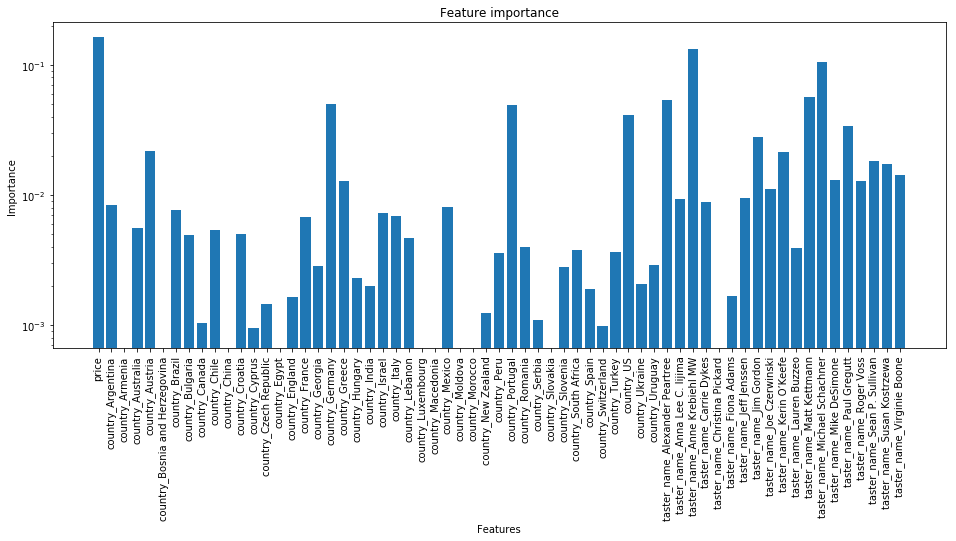

In [100]:
# Plot the figire and inspect the top features
plt.figure(figsize=(16, 6))
plt.yscale('log', nonposy='clip')
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), feature_names, rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [106]:
final_features_df.columns

Index(['price', 'country_Argentina', 'country_Armenia', 'country_Australia',
       'country_Austria', 'country_Bosnia and Herzegovina', 'country_Brazil',
       'country_Bulgaria', 'country_Canada', 'country_Chile', 'country_China',
       'country_Croatia', 'country_Cyprus', 'country_Czech Republic',
       'country_Egypt', 'country_England', 'country_France', 'country_Georgia',
       'country_Germany', 'country_Greece', 'country_Hungary', 'country_India',
       'country_Israel', 'country_Italy', 'country_Lebanon',
       'country_Luxembourg', 'country_Macedonia', 'country_Mexico',
       'country_Moldova', 'country_Morocco', 'country_New Zealand',
       'country_Peru', 'country_Portugal', 'country_Romania', 'country_Serbia',
       'country_Slovakia', 'country_Slovenia', 'country_South Africa',
       'country_Spain', 'country_Switzerland', 'country_Turkey', 'country_US',
       'country_Ukraine', 'country_Uruguay', 'taster_name_Alexander Peartree',
       'taster_name_Anna Lee C

In [110]:
# Create df for correlation matrix to see which variable are most corrleated to the koi_disposition target
top_features_df = clean_feaures_target[['price', 'country_Australia', 'points',
       'country_Austria','country_Portugal', 'country_US', 'taster_name_Alexander Peartree', 'taster_name_Matt Kettmann', 'taster_name_Michael Schachner','taster_name_Paul Gregutt']]

top_features_df.head()

,price,country_Australia,points,country_Austria,country_Portugal,country_US,taster_name_Alexander Peartree,taster_name_Matt Kettmann,taster_name_Michael Schachner,taster_name_Paul Gregutt
1,15.0,0,87,0,1,0,0,0,0,0
2,14.0,0,87,0,0,1,0,0,0,1
3,13.0,0,87,0,0,1,1,0,0,0
4,65.0,0,87,0,0,1,0,0,0,1
5,15.0,0,87,0,0,0,0,0,1,0


In [111]:
# Create base correlation matrix
corr_matrix = top_features_df.corr()

# Select upper triangle of correlation matrix so that I only cmpare features to other features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

upper

,price,country_Australia,points,country_Austria,country_Portugal,country_US,taster_name_Alexander Peartree,taster_name_Matt Kettmann,taster_name_Michael Schachner,taster_name_Paul Gregutt
price,NaN,0.000252,0.416167,-0.017260,-0.045682,0.026605,-0.009003,0.018635,-0.092751,-0.012228
country_Australia,NaN,NaN,0.007927,-0.021397,-0.028489,-0.125392,-0.008137,-0.032415,-0.052208,-0.040582
points,NaN,NaN,NaN,0.089418,-0.007078,0.042809,-0.049352,0.123456,-0.186575,0.063806
country_Austria,NaN,NaN,NaN,NaN,-0.031536,-0.138804,-0.009008,-0.035882,-0.057792,-0.044922
country_Portugal,NaN,NaN,NaN,NaN,NaN,-0.184814,-0.011993,-0.047776,-0.075800,-0.059813
country_US,NaN,NaN,NaN,NaN,NaN,NaN,0.064894,0.258430,-0.335101,0.309611
taster_name_Alexander Peartree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.013646,-0.021979,-0.017084
taster_name_Matt Kettmann,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.087552,-0.068055
taster_name_Michael Schachner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.109612
taster_name_Paul Gregutt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
top_features_df.to_csv(r'C:\Users\howar\Desktop\Data Science Boot Camp\Group_Project_3\Group_Project_3\prediction_modeling\wine_features.csv', index=False)

In [115]:
final_targets_df = pd.DataFrame(final_targets_df)

final_targets_df.head()

,points
1,87
2,87
3,87
4,87
5,87


In [117]:
final_targets_df.to_csv(r'C:\Users\howar\Desktop\Data Science Boot Camp\Group_Project_3\Group_Project_3\prediction_modeling\wine_targets.csv', index=False)